### Kalman Filter applied in market beta

In [15]:
### Importing librarys
import pandas as pd
import numpy as np
from pykalman import KalmanFilter
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') #### Plot style

In [16]:
### Importing data from economatica
df = pd.read_excel('C:/Users/Jhona/OneDrive - Grupo Marista/TCC/Dados (Temporário)/retornos_diarios.xlsx', skiprows=3, 
                    parse_dates=True, index_col=0)
ibov = pd.read_excel('C:/Users/Jhona/OneDrive - Grupo Marista/TCC/Dados (Temporário)/retornos_ibov.xlsx', skiprows=3, 
                    parse_dates=True, index_col=0)

##### Manipulating data

In [17]:
df.drop(index=df.index[0], axis=0, inplace=True) ### excluding the first row 
ibov.drop(index=df.index[0], axis=0, inplace=True)

In [18]:
df.replace(to_replace=['-'], value=np.nan, inplace=True) ### replace string
ibov.replace(to_replace=['-'], value=np.nan, inplace=True)

In [19]:
### Function to replace columns name
def columns(df): #renomeando colunas com as ações
    df.columns = df.columns.str[39:]
columns(df)
ibov.rename(columns={'Fechamento\najust p/ prov\nEm moeda orig': 'Ibovespa'}, inplace=True)

In [20]:
df.isnull().sum() ### counting NaN values in Data Frame

ABCB4    154
ALPA4    154
ABEV3    154
AMER3    154
B3SA3    154
        ... 
VULC3    555
WEGE3    154
WHRL4    341
PORT3    263
YDUQ3    154
Length: 135, dtype: int64

In [21]:
df.fillna(method = 'ffill', inplace=True)
ibov.fillna(method='ffill', inplace=True)

In [22]:
### Pct change assets
df_pct = df.pct_change()
df_pct.dropna(inplace=True)
df_pct = df_pct.loc[:'2022-06-30']

### Pct change iboc
ibov_pct = ibov.pct_change()
ibov_pct.dropna(inplace=True)

In [23]:
matrix = pd.concat([df_pct, ibov_pct], axis=1)

In [24]:
matrix.dropna(inplace=True)

### Filtro de Kalman

In [25]:
obs_mat = np.expand_dims(np.vstack([[matrix['Ibovespa']], [np.ones(len(matrix['Ibovespa']))]]).T, axis=1)


In [26]:
kf = KalmanFilter(n_dim_obs=1, n_dim_state=2,
                  initial_state_mean=[0,0],
                  initial_state_covariance=np.ones((2, 2)),
                  transition_matrices=np.eye(2),
                  observation_matrices=obs_mat,
                  observation_covariance=2
                  )

In [27]:
state_means = []
for i in matrix.columns:
    state_means.append(kf.filter(matrix[i].values)[0])


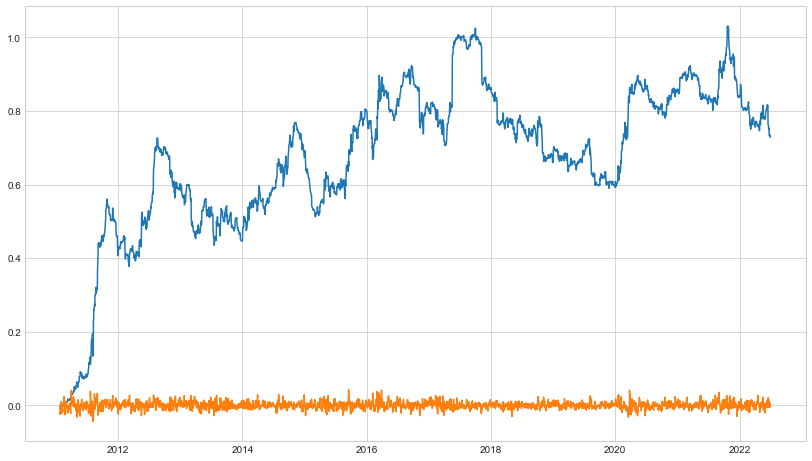

In [28]:
plt.figure(figsize = (14,8))
plt.plot(df_pct.index, state_means[0], label = "Coeficiente")